In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
import os
os.chdir("drive/My Drive/AY_hackathon_2021-05-28")

In [ ]:
# Importing Libraries
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer, make_column_transformer
import matplotlib.pyplot as plt
from scipy import stats

In [ ]:
# Importing dataframe
data = pd.read_csv('train_datawig.csv')

In [ ]:
df = data.copy()

In [ ]:
df.shape

(245725, 11)

In [ ]:
df.describe()

,Unnamed: 0,Age,Avg_Account_Balance,Is_Lead,Vintage
count,245725.000000,245725.000000,2.457250e+05,245725.000000,245725.000000
mean,122862.000000,43.856307,1.128403e+06,0.237208,46.959141
std,70934.841786,14.828672,8.529364e+05,0.425372,32.353136
min,0.000000,23.000000,2.079000e+04,0.000000,7.000000
25%,61431.000000,30.000000,6.043100e+05,0.000000,20.000000
50%,122862.000000,43.000000,8.946010e+05,0.000000,32.000000
75%,184293.000000,54.000000,1.366666e+06,0.000000,73.000000
max,245724.000000,85.000000,1.035201e+07,1.000000,135.000000


In [ ]:
df.head(2)

,Unnamed: 0,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
0,6,62,1056750,X3,Yes,Male,Yes,1,Other,RG282,20
1,15,33,517063,X2,Yes,Male,Yes,1,Self_Employed,RG268,69


In [ ]:
df.dtypes

Unnamed: 0              int64
Age                     int64
Avg_Account_Balance     int64
Channel_Code           object
Credit_Product         object
Gender                 object
Is_Active              object
Is_Lead                 int64
Occupation             object
Region_Code            object
Vintage                 int64
dtype: object

In [ ]:
# Dropping the ID Columns
df.drop(['Unnamed: 0'], axis=1,inplace=True )

In [ ]:
df.columns

Index(['Age', 'Avg_Account_Balance', 'Channel_Code', 'Credit_Product',
       'Gender', 'Is_Active', 'Is_Lead', 'Occupation', 'Region_Code',
       'Vintage'],
      dtype='object')

### Duplicate Rows

In [ ]:
#Checking duplicate rows
check_duplicate_rows= df[df.duplicated(keep='first')]
check_duplicate_rows.head(5)

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
50598,39,1476563,X1,No,Female,No,0,Self_Employed,RG270,32
73618,31,1435587,X1,No,Female,No,0,Salaried,RG260,26
126034,28,1088995,X1,No,Female,Yes,0,Salaried,RG254,26
137651,27,739821,X3,Yes,Female,No,0,Salaried,RG268,20
141545,75,930610,X3,No,Male,Yes,0,Other,RG254,75


In [ ]:
#Checking duplicate rows
check_duplicate_rows= df[df.duplicated(keep='last')]
check_duplicate_rows.head(5)

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Is_Lead,Occupation,Region_Code,Vintage
29708,27,739821,X3,Yes,Female,No,0,Salaried,RG268,20
32903,39,1476563,X1,No,Female,No,0,Self_Employed,RG270,32
45522,28,1075582,X1,No,Male,No,0,Salaried,RG261,31
48788,28,1088995,X1,No,Female,Yes,0,Salaried,RG254,26
51200,32,3597985,X2,No,Male,Yes,0,Other,RG284,33


In [ ]:
#Dropping duplicate rows
df.drop_duplicates(keep='first')
df.shape

(245725, 10)

### Checking the count for each categorical data 
##### To check if anyone has biased feature

In [ ]:
df['Credit_Product'].value_counts()

No     150505
Yes     95220
Name: Credit_Product, dtype: int64

In [ ]:
# Lokking at unique values in categotical column
print("Region_Code: {}".format(df['Region_Code'].nunique()))
print("Occupation: {}".format(df['Occupation'].nunique()))
print("Channel_Code: {}".format(df['Channel_Code'].nunique()))
print("Is_Active: {}".format(df['Is_Active'].nunique()))
print("Gender: {}".format(df['Gender'].nunique()))

Region_Code: 35
Occupation: 4
Channel_Code: 4
Is_Active: 2
Gender: 2


In [ ]:
df['Region_Code'].value_counts()

RG268    35934
RG283    29416
RG254    26840
RG284    19320
RG277    12826
RG280    12775
RG269     7863
RG270     7720
RG261     7633
RG257     6101
RG251     5950
RG282     5829
RG274     5286
RG272     5252
RG281     5093
RG273     4497
RG252     4286
RG279     3976
RG263     3687
RG275     3245
RG260     3110
RG256     2847
RG264     2793
RG276     2764
RG259     2586
RG250     2496
RG255     2018
RG258     1951
RG253     1858
RG278     1822
RG262     1788
RG266     1578
RG265     1546
RG271     1542
RG267     1497
Name: Region_Code, dtype: int64

In [ ]:
df['Occupation'].value_counts()

Self_Employed    100886
Salaried          71999
Other             70173
Entrepreneur       2667
Name: Occupation, dtype: int64

In [ ]:
df['Gender'].value_counts()

Male      134197
Female    111528
Name: Gender, dtype: int64

In [ ]:
df['Channel_Code'].value_counts()

X1    103718
X3     68712
X2     67726
X4      5569
Name: Channel_Code, dtype: int64

In [ ]:
df['Is_Active'].value_counts()

No     150290
Yes     95435
Name: Is_Active, dtype: int64

### Detecting Outliers

<AxesSubplot:>

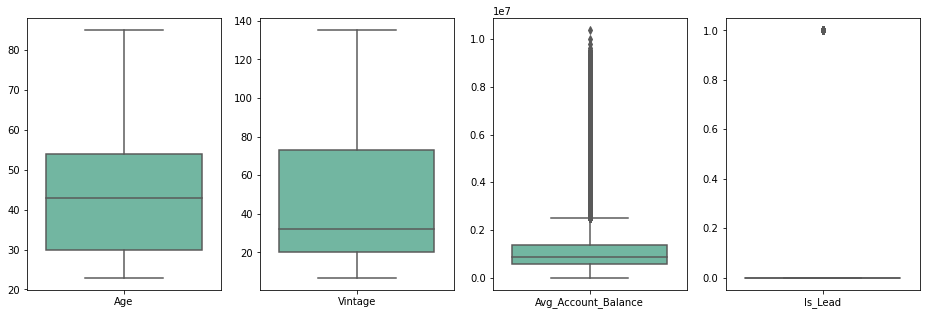

In [ ]:
fig, (axes) = plt.subplots(nrows=1, ncols=4, figsize=(16, 5))

sns.boxplot(data=df[['Age']], palette='Set2',ax=axes[0])
sns.boxplot(data=df[['Vintage']], palette='Set2',ax=axes[1])
sns.boxplot(data=df[['Avg_Account_Balance']], palette='Set2',ax=axes[2])
sns.boxplot(data=df[['Is_Lead']], palette='Set2',ax=axes[3])  

In [ ]:
df_outlier =df[['Avg_Account_Balance']].copy()

In [ ]:
z=np.abs(stats.zscore(df_outlier))

In [ ]:
z.shape

(245725, 1)

In [ ]:
Q1 = df_outlier.quantile(0.25)
Q3 = df_outlier.quantile(0.75)
IQR = Q3-Q1

In [ ]:
print("IQR: {}".format(IQR))

IQR: Avg_Account_Balance    762356.0
dtype: float64


In [ ]:
col_name = 'Avg_Account_Balance'
low = Q1[col_name] - 1.5* IQR[col_name]
high = Q1[col_name] + 1.5* IQR[col_name]

In [ ]:
print('High: {}'.format(high))
print('Low: {}'.format(low))

High: 1747844.0
Low: -539224.0


In [ ]:
query_string = '{} < @low or {} > @high'.format(col_name, col_name)
outliers = df_outlier.query(query_string).index

In [ ]:
outliers.shape

(36242,)

In [ ]:
outlier_data = df.loc[outliers]

In [ ]:
outlier_data['Is_Lead'].value_counts()

0    26153
1    10089
Name: Is_Lead, dtype: int64

In [ ]:
outlier_data['Credit_Product'].isnull().sum()

0

<AxesSubplot:>

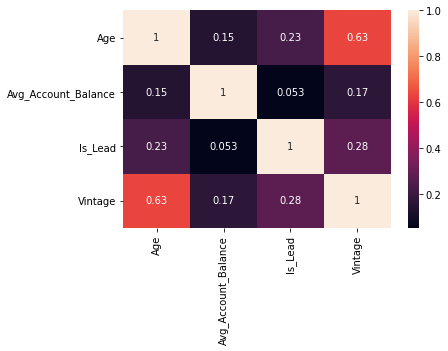

In [ ]:
sns.heatmap(df.corr(), annot=True)

### Missing Values

In [ ]:
# Checking missing values
df.isnull().sum()

Age                    0
Avg_Account_Balance    0
Channel_Code           0
Credit_Product         0
Gender                 0
Is_Active              0
Is_Lead                0
Occupation             0
Region_Code            0
Vintage                0
dtype: int64

### Binning

In [ ]:
grouped_df_sum = df.groupby(['Age'])['Is_Lead'].sum()

In [ ]:
grouped_df = df.groupby(['Age'])['Is_Lead'].count()

In [ ]:
percentage= ((grouped_df-grouped_df_sum)*100)/grouped_df

In [ ]:
percentage_df= pd.DataFrame(percentage)

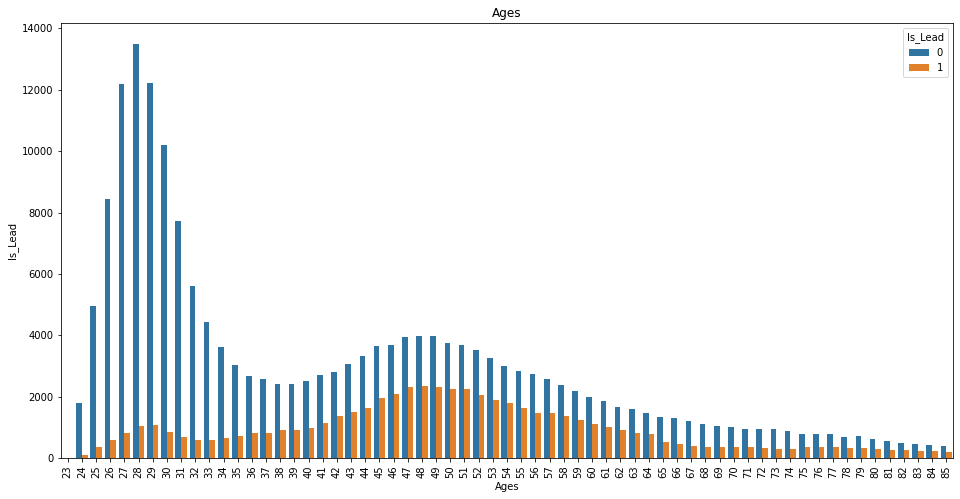

In [ ]:
plt.figure(figsize = (16,8)) 
plt.xticks(rotation=90)
plt.title('Ages')
sns.countplot(x=df["Age"],hue = 'Is_Lead',data=df);
plt.xlabel('Ages')
plt.ylabel('Is_Lead');

In [ ]:
percentage_df.head(60)
# <=32 - 90% no
#33-41 -90-70%
#42-64 - 65% no
#65-74 - 72-75% no
# 75+  -

,Is_Lead
Age,
23,100.000000
24,94.173228
25,93.084605
26,93.461666
27,93.679354
28,92.850753
29,91.975309
30,92.228447
31,91.883541


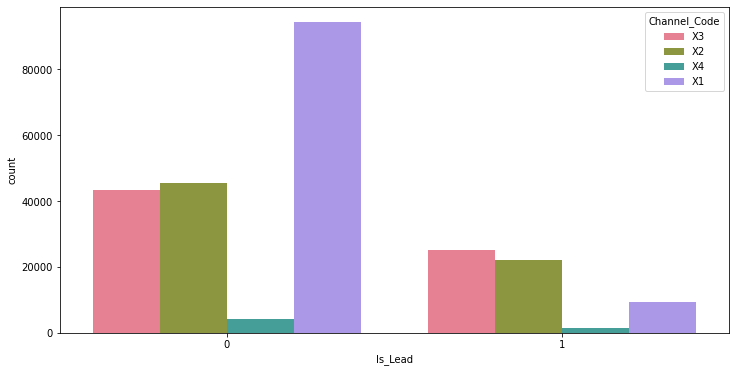

In [ ]:
#print(df.groupby('Region_Code')["Is_Lead"].sum())
plt.figure(figsize = (12,6)) 
sns.countplot(x="Is_Lead",hue = "Channel_Code", data=df, palette="husl");

In [ ]:
region_sum = df.groupby('Region_Code')["Is_Lead"].sum()
region_count = df.groupby('Region_Code')["Is_Lead"].count()
region_percentage = ((region_count-region_sum)*100)/region_count
region_df = pd.DataFrame(region_percentage)
region_df.sort_values(by=['Is_Lead'])

# Conclusion derived from 

# INFERENCE
# 85%+ i.e. <15%       : Is_Lead:    RG267, RG270,RG256,RG266,RG252,RG264
# 85 to 80 i.e. 15-20% : Is_Lead:  RG259,RG282,RG257,RG260,RG262,RG271,RG261,RG275,RG274,RG250
# 80 to 75 i.e. 20-25% : Is_Lead: RG273,RG280,RG255,RG251,RG277,RG279,RG263,RG269,RG258,RG272,RG278,RG281,RG254
# 75%-  i.e >25        : Is_Lead:      RG283,RG284,RG268,RG276,RG253,RG265


,Is_Lead
Region_Code,
RG283,69.795349
RG284,69.896480
RG268,70.020037
RG276,72.214182
RG253,74.111948
RG265,74.126779
RG273,76.228597
RG280,76.446184
RG255,76.759167


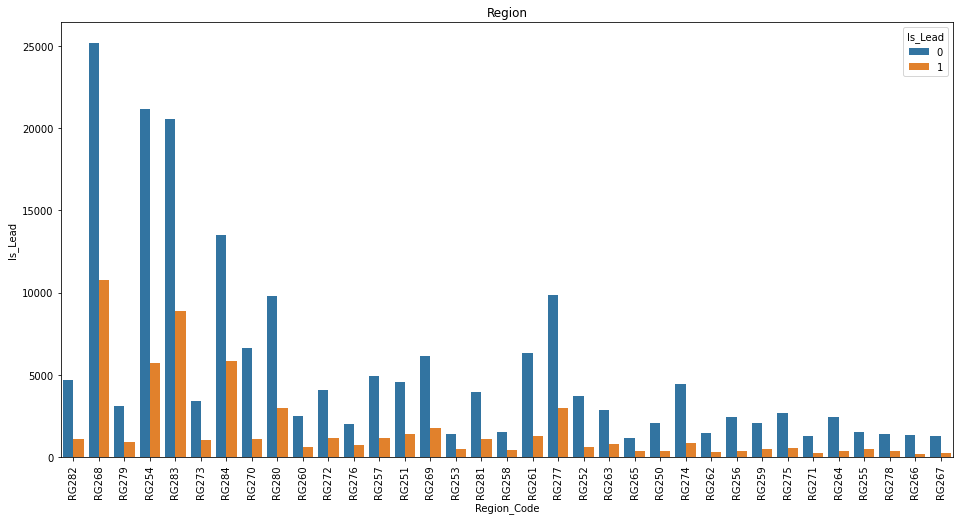

In [ ]:
plt.figure(figsize = (16,8)) 
plt.xticks(rotation=90)
plt.title('Region')
sns.countplot(x=df["Region_Code"],hue = 'Is_Lead',data=df);
plt.xlabel('Region_Code')
plt.ylabel('Is_Lead');

In [ ]:
#Funtion for making age bins

# <=32 - 90% no
#33-41 -90-70%
#42-64 - 65% n
#65-74 - 72-75% no
# 75+  -
def group_age(df): 
    for i in range(len(df['Age'])):
        if df['Age'][i] < 33:
            df.loc[i, "Age"] = "grp_1"
        elif df['Age'][i] >=33 and df['Age'][i] < 42:
            df.loc[i, "Age"] = "grp_2"
        elif df['Age'][i] >=42 and df['Age'][i] < 65:
            df.loc[i, "Age"] = "grp_3"
        elif df['Age'][i] >=65 and df['Age'][i] < 74:
            df.loc[i, "Age"] = "grp_4"
        else:
            df.loc[i, "Age"] = "grp_5"
    return df


In [ ]:
df = group_age(df)

In [ ]:
df["Age"].value_counts()

grp_3    104541
grp_1     82761
grp_2     33949
grp_4     13331
grp_5     11143
Name: Age, dtype: int64

In [ ]:
# Making Region Bins

# 85%+ i.e. <15%       : Is_Lead:    RG267, RG270,RG256,RG266,RG252,RG264
#85 to 80 i.e. 15-20%  : Is_Lead:  RG259,RG282,RG257,RG260,RG262,RG271,RG261,RG275,RG274,RG250
#80 to 75 i.e. 20-25%  : Is_Lead: RG273,RG280,RG255,RG251,RG277,RG279,RG263,RG269,RG258,RG272,RG278,RG281,RG254
#75%-  i.e >25         : Is_Lead:      RG283,RG284,RG268,RG276,RG253,RG265


def make_region_bins(df):
    for i in range(len(df['Region_Code'])):
        if df['Region_Code'][i] in ('RG283','RG284','RG268','RG276','RG253','RG265'):
            df.loc[i, 'Region_Code'] = "reg_1"
        elif df['Region_Code'][i] in ('RG273','RG280','RG255','RG251','RG277','RG279','RG263','RG269','RG258','RG272','RG278','RG281','RG254'):
            df.loc[i, 'Region_Code'] = "reg_2"
        elif df['Region_Code'][i] in ('RG259','RG282','RG257','RG260','RG262','RG271','RG261','RG275','RG274','RG250'):
            df.loc[i, 'Region_Code'] = "reg_3"
        else:
            df.loc[i, 'Region_Code'] = "reg_4"
    return df

In [ ]:
df = make_region_bins(df)

In [ ]:
df['Region_Code'].value_counts()

reg_2    94550
reg_1    90838
reg_3    39616
reg_4    20721
Name: Region_Code, dtype: int64

In [ ]:
df.columns

Index(['Unnamed: 0', 'Age', 'Avg_Account_Balance', 'Channel_Code',
       'Credit_Product', 'Gender', 'Is_Active', 'Is_Lead', 'Occupation',
       'Region_Code', 'Vintage'],
      dtype='object')

In [ ]:
df.to_csv('Binned_train.csv', index=None)

In [ ]:
df = pd.read_csv('Binned_train.csv')

### Encoding of the categorica Variables


In [ ]:
# Looking at the dtypes 
df.dtypes

Age                    object
Avg_Account_Balance     int64
Channel_Code           object
Credit_Product         object
Gender                 object
Is_Active              object
Is_Lead                 int64
Occupation             object
Region_Code            object
Vintage                 int64
dtype: object

In [ ]:
df.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
#Specifying the columns
df.columns

Index(['Age', 'Avg_Account_Balance', 'Channel_Code', 'Credit_Product',
       'Gender', 'Is_Active', 'Is_Lead', 'Occupation', 'Region_Code',
       'Vintage'],
      dtype='object')

In [ ]:
#Encoding categorical varibales 
df_encoded = pd.get_dummies(df, columns=['Gender','Credit_Product', 'Region_Code', 'Occupation', 'Channel_Code','Is_Active','Age'])

In [ ]:
# Looking at the data
df_encoded.head(2)

,Avg_Account_Balance,Is_Lead,Vintage,Gender_Female,Gender_Male,Credit_Product_No,Credit_Product_Yes,Region_Code_reg_1,Region_Code_reg_2,Region_Code_reg_3,Region_Code_reg_4,Occupation_Entrepreneur,Occupation_Other,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Channel_Code_X4,Is_Active_No,Is_Active_Yes,Age_grp_1,Age_grp_2,Age_grp_3,Age_grp_4,Age_grp_5
0,1056750,1,20,0,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
1,517063,1,69,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0


In [ ]:
# Specifying Encoded Columns
df_encoded.columns

Index(['Avg_Account_Balance', 'Is_Lead', 'Vintage', 'Gender_Female',
       'Gender_Male', 'Credit_Product_No', 'Credit_Product_Yes',
       'Region_Code_reg_1', 'Region_Code_reg_2', 'Region_Code_reg_3',
       'Region_Code_reg_4', 'Occupation_Entrepreneur', 'Occupation_Other',
       'Occupation_Salaried', 'Occupation_Self_Employed', 'Channel_Code_X1',
       'Channel_Code_X2', 'Channel_Code_X3', 'Channel_Code_X4', 'Is_Active_No',
       'Is_Active_Yes', 'Age_grp_1', 'Age_grp_2', 'Age_grp_3', 'Age_grp_4',
       'Age_grp_5'],
      dtype='object')

In [ ]:
# Dropping last columns of each feature, to avoid dummy variable trap 
df_encoded.drop(['Gender_Female','Is_Active_No','Channel_Code_X4','Occupation_Other','Region_Code_reg_4','Credit_Product_No','Age_grp_1'], axis=1, inplace=True)

In [ ]:
# Final Columns
df_encoded.columns


Index(['Avg_Account_Balance', 'Is_Lead', 'Vintage', 'Gender_Male',
       'Credit_Product_Yes', 'Region_Code_reg_1', 'Region_Code_reg_2',
       'Region_Code_reg_3', 'Occupation_Entrepreneur', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X1', 'Channel_Code_X2',
       'Channel_Code_X3', 'Is_Active_Yes', 'Age_grp_2', 'Age_grp_3',
       'Age_grp_4', 'Age_grp_5'],
      dtype='object')

In [ ]:
# Renaming Columns
df_encoded.rename(columns = {'Gender_Male':'Gender', 'Is_Active_Yes':'Is_Active','Credit_Product_Yes':'Credit_Product'}, inplace=True)

In [ ]:
# Count of each value in 'Credit_Product'
df_encoded['Credit_Product'].value_counts()

0    150505
1     95220
Name: Credit_Product, dtype: int64

In [ ]:
#Verifying there is no null
df_encoded.isnull().sum()


Avg_Account_Balance         0
Is_Lead                     0
Vintage                     0
Gender                      0
Credit_Product              0
Region_Code_reg_1           0
Region_Code_reg_2           0
Region_Code_reg_3           0
Occupation_Entrepreneur     0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X1             0
Channel_Code_X2             0
Channel_Code_X3             0
Is_Active                   0
Age_grp_2                   0
Age_grp_3                   0
Age_grp_4                   0
Age_grp_5                   0
dtype: int64

### Scaling the data

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler

In [ ]:
balance = df_encoded.loc[:,['Avg_Account_Balance']]
robust_scaler = RobustScaler()
balance_df = pd.DataFrame(robust_scaler.fit_transform(balance),
                   columns=['Avg_Account_Balance'],
                   index = balance.index)


In [ ]:
vintage= df_encoded.loc[:,['Vintage']]
min_max_scaler = MinMaxScaler()
vintage_df = pd.DataFrame(min_max_scaler.fit_transform(balance),
                   columns=['Vintage'],
                   index = vintage.index)

In [ ]:
df_scaled = df_encoded.copy()
df_scaled['Avg_Account_Balance'] = balance_df['Avg_Account_Balance']
df_scaled['Vintage'] = vintage_df['Vintage']
df_scaled.head()

,Avg_Account_Balance,Is_Lead,Vintage,Gender,Credit_Product,Region_Code_reg_1,Region_Code_reg_2,Region_Code_reg_3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Is_Active,Age_grp_2,Age_grp_3,Age_grp_4,Age_grp_5
0,0.212695,1,0.100275,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0
1,-0.495225,1,0.048036,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0
2,0.233813,1,0.101833,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0
3,0.088911,1,0.091141,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0
4,0.465292,1,0.118914,0,1,0,1,0,0,0,0,0,0,1,1,0,1,0,0


In [ ]:
#creating a copy
df_train = df_scaled.copy()

### Splitting the Data

In [ ]:
x_train = df_train.drop(['Is_Lead'],axis=1)
y_train = df_train['Is_Lead']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid=train_test_split(x_train,y_train, test_size=0.2,random_state=42)

In [ ]:
x_train.dtypes

Avg_Account_Balance         float64
Vintage                     float64
Gender                        uint8
Credit_Product                uint8
Region_Code_reg_1             uint8
Region_Code_reg_2             uint8
Region_Code_reg_3             uint8
Occupation_Entrepreneur       uint8
Occupation_Salaried           uint8
Occupation_Self_Employed      uint8
Channel_Code_X1               uint8
Channel_Code_X2               uint8
Channel_Code_X3               uint8
Is_Active                     uint8
Age_grp_2                     uint8
Age_grp_3                     uint8
Age_grp_4                     uint8
Age_grp_5                     uint8
dtype: object

## Models
Different types have models have been tried to find out the best model.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import f1_score , accuracy_score
from sklearn.metrics import roc_auc_score,classification_report,accuracy_score

In [ ]:
# Utility function to print metircs
def print_stats(y_true,y_pred,y_pred_prob):
    print("ROC_AUC_Score",roc_auc_score(y_true,y_pred_prob))
    print("Classification report",classification_report(y_true, y_pred))
    print("Accuracy Score: ",accuracy_score(y_true, y_pred))

### Logistic Regression

In [ ]:
def logistic_regression(x_train,y_train):
  clf = LogisticRegression()
  clf.fit(x_train,y_train)
  return clf

In [ ]:
clf_lr = logistic_regression(x_train,y_train)
y_pred = clf_lr.predict(x_valid)
y_pred_prob=clf_lr.predict_proba(x_valid)[:, 1]
#y_pred[y_pred >=0.5] = 1
#y_pred[y_pred<0.5] = 0

In [ ]:
y_pred_prob

array([0.04092054, 0.44902002, 0.01529488, ..., 0.17669187, 0.13273188,
       0.10177563])

In [ ]:
auc = roc_auc_score(y_valid, y_pred)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.679
accuracy_score test: 0.8100111913724692
F1 score 0.5145827917858071


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8168908220062914
Classification report               precision    recall  f1-score   support

           0       0.84      0.92      0.88     37800
           1       0.63      0.44      0.51     11345

    accuracy                           0.81     49145
   macro avg       0.74      0.68      0.70     49145
weighted avg       0.79      0.81      0.80     49145

Accuracy Score:  0.8100111913724692


### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier 

In [ ]:
from sklearn.tree import DecisionTreeClassifier 
def decision_tree(x_train,y_train):
  clf_dt = DecisionTreeClassifier(criterion='gini',
              min_samples_split=1000,
              class_weight='balanced')
  clf_dt.fit(x_train,y_train) 
  clf_dt.fit(x_train, y_train) 
  return clf_dt

In [ ]:
clf_dt = decision_tree(x_train,y_train)
y_pred = clf_dt.predict(x_valid)
y_pred_prob=clf_dt.predict_proba(x_valid)[:, 1]

In [ ]:
auc = roc_auc_score(y_valid, y_pred_prob)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.817
accuracy_score test: 0.7735883609726321
F1 score 0.606555638060889


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8170650287635743
Classification report               precision    recall  f1-score   support

           0       0.91      0.78      0.84     37800
           1       0.51      0.76      0.61     11345

    accuracy                           0.77     49145
   macro avg       0.71      0.77      0.72     49145
weighted avg       0.82      0.77      0.79     49145

Accuracy Score:  0.7735883609726321


### Xgboost

In [ ]:
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)
y_pred = clf_xgb.predict(x_valid)
y_pred_prob=clf_xgb.predict_proba(x_valid)[:, 1]

/home/ps/miniconda3/envs/exp1/lib/python3.7/site-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:01:34] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


In [ ]:
auc = roc_auc_score(y_valid, y_pred)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.686
accuracy_score test: 0.8140604334113338
F1 score 0.5265775567298725


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8253415624905267
Classification report               precision    recall  f1-score   support

           0       0.85      0.92      0.88     37800
           1       0.64      0.45      0.53     11345

    accuracy                           0.81     49145
   macro avg       0.74      0.69      0.71     49145
weighted avg       0.80      0.81      0.80     49145

Accuracy Score:  0.8140604334113338


### Random Forest

In [ ]:
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(x_train, y_train)
y_pred = clf_rf.predict(x_valid)
y_pred_prob=clf_rf.predict_proba(x_valid)[:, 1]

In [ ]:
auc = roc_auc_score(y_valid, y_pred)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.655
accuracy_score test: 0.7556007732220978
F1 score 0.46959593729300064


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.7561652022544485
Classification report               precision    recall  f1-score   support

           0       0.84      0.84      0.84     37800
           1       0.47      0.47      0.47     11345

    accuracy                           0.76     49145
   macro avg       0.66      0.66      0.66     49145
weighted avg       0.76      0.76      0.76     49145

Accuracy Score:  0.7556007732220978


### Naive Bias

In [ ]:
from sklearn.naive_bayes import GaussianNB
clf_nb= GaussianNB()
clf_nb=clf_nb.fit(x_train, y_train)
y_pred = clf_nb.predict(x_valid)
y_pred_prob=clf_nb.predict_proba(x_valid)[:, 1]

In [ ]:
auc = roc_auc_score(y_valid, y_pred)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.693
accuracy_score test: 0.767931630888188
F1 score 0.5244944757139878


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.7662222478727547
Classification report               precision    recall  f1-score   support

           0       0.86      0.83      0.85     37800
           1       0.50      0.55      0.52     11345

    accuracy                           0.77     49145
   macro avg       0.68      0.69      0.69     49145
weighted avg       0.78      0.77      0.77     49145

Accuracy Score:  0.767931630888188


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf_knn = KNeighborsClassifier(n_neighbors = 7, metric = 'minkowski', p = 2)
clf_knn = clf_knn.fit(x_train, y_train)
y_pred = clf_knn.predict(x_valid)
y_pred_prob=clf_knn.predict_proba(x_valid)[:, 1]

In [ ]:
auc = roc_auc_score(y_valid, y_pred)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.682
accuracy_score test: 0.7992674738020145
F1 score 0.516918858038294


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.7830036936766773
Classification report               precision    recall  f1-score   support

           0       0.85      0.90      0.87     37800
           1       0.58      0.47      0.52     11345

    accuracy                           0.80     49145
   macro avg       0.72      0.68      0.70     49145
weighted avg       0.79      0.80      0.79     49145

Accuracy Score:  0.7992674738020145


### Light GBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier().fit(x_train,y_train)
y_pred = lgbm.predict(x_valid)


In [ ]:
y_pred_prob=lgbm.predict_proba(x_valid)[:, 1]
print_stats(y_valid,y_pred,y_pred_prob)

ROC_AUC_Score 0.8274668268659013
Classification report               precision    recall  f1-score   support

           0       0.85      0.93      0.89     37800
           1       0.65      0.44      0.52     11345

    accuracy                           0.82     49145
   macro avg       0.75      0.68      0.71     49145
weighted avg       0.80      0.82      0.80     49145

Accuracy Score:  0.816034184555906


### SVM kernel

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(kernel = 'rbf', random_state = 0)
clf_svm = clf_svm.fit(x_train, y_train)
y_pred = clf_svm.predict(x_valid)

In [ ]:
auc = roc_auc_score(y_valid, y_pred)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.713
accuracy_score test: 0.8303046336053397
F1 score 0.5793694829760404


### Neural Networks

In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from keras.layers import Dropout

In [ ]:
x_train.shape

(196580, 18)

In [ ]:
classifier = Sequential()  
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', 
                     activation = 'relu', input_dim = 18))  
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', 
                     activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', 
                     activation = 'sigmoid'))   


In [ ]:
opt=tf.keras.optimizers.Adamax()
classifier.compile(optimizer = opt, loss = 'binary_crossentropy',
                   metrics = [tf.keras.metrics.AUC()])

In [ ]:
classifier.fit(x_train, y_train, batch_size = 10, epochs = 32)  

Epoch 1/32
19658/19658 [==============================] - 27s 1ms/step - loss: 0.5032 - auc_5: 0.6176
Epoch 2/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4413 - auc_5: 0.7690
Epoch 3/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4328 - auc_5: 0.7838
Epoch 4/32
19658/19658 [==============================] - 26s 1ms/step - loss: 0.4256 - auc_5: 0.7910
Epoch 5/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4264 - auc_5: 0.7948
Epoch 6/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4249 - auc_5: 0.7976
Epoch 7/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4255 - auc_5: 0.7996
Epoch 8/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4228 - auc_5: 0.8011
Epoch 9/32
19658/19658 [==============================] - 25s 1ms/step - loss: 0.4240 - auc_5: 0.8023
Epoch 10/32
19658/19658 [==============================] - 26s 1ms/step - loss: 0.

In [ ]:
y_pred_prob = classifier.predict(x_valid)     #it will return probability
y_pred = (y_pred_prob > 0.5)                     


In [ ]:
auc = roc_auc_score(y_valid, y_pred_prob)
print('AUC: %.3f' % auc)
print('accuracy_score test:', accuracy_score(y_valid,y_pred))  
print('F1 score',f1_score(y_valid, y_pred))

AUC: 0.826
accuracy_score test: 0.8152406145080883
F1 score 0.47750028772010583


In [ ]:
print_stats(y_valid,y_pred,y_pred_prob)

0.8255196354826148
              precision    recall  f1-score   support

           0       0.83      0.95      0.89     37800
           1       0.69      0.37      0.48     11345

    accuracy                           0.82     49145
   macro avg       0.76      0.66      0.68     49145
weighted avg       0.80      0.82      0.79     49145

0.8152406145080883


In [ ]:
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
import keras
from keras.layers import Dropout

In [ ]:
def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu', input_dim = 18))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 6, kernel_initializer = 'he_uniform', activation = 'relu'))
    classifier.add(Dropout(0.1))
    classifier.add(Dense(units = 1, kernel_initializer = 'he_uniform', activation = 'sigmoid'))
    classifier.compile(optimizer ='rmsprop', loss = 'binary_crossentropy', metrics =["accuracy"])
    return classifier


In [ ]:
classifier = KerasClassifier(build_fn = build_classifier, batch_size = 32, epochs = 20,verbose=0)
accuracies = cross_val_score(estimator = classifier, X = x_train, y = y_train, cv = 10)
mean = accuracies.mean()
variance = accuracies.std()

In [ ]:
print(mean)
print(variance)

0.8082307517528534
0.0032604238357104103


In [ ]:
'''
'metrics': [tf.keras.metrics.AUC(),tf.keras.metrics.TruePositives()]

classifier = KerasClassifier(build_fn = build_classifier)
adamax = tf.keras.optimizers.Adamax()
parameters = {'batch_size': [25, 32],'epochs': [50,20],'optimizer': ['rmsprop']} 
grid_search = GridSearchCV(estimator = classifier,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10)
grid_search = grid_search.fit(x_train, y_train) 
best_parameters = grid_search.best_params_ 
best_accuracy = grid_search.best_score_        #gives best accuracy
'''

### Training on the entire Data Set

In [ ]:
x_train = df_train.drop(['Is_Lead'],axis=1)
y_train = df_train['Is_Lead']

In [ ]:
#DT
def decision_tree(x_train,y_train):
  clf_dt = DecisionTreeClassifier(criterion='gini',
              min_samples_split=1000,
              class_weight='balanced')
  clf_dt.fit(x_train,y_train) 
  clf_dt.fit(x_train, y_train) 
  return clf_dt
clf_dt = decision_tree(x_train,y_train)
y_pred = clf_dt.predict(x_valid)
y_pred_prob=clf_dt.predict_proba(x_valid)[:, 1]

In [ ]:
#xgb
from xgboost import XGBClassifier
clf_xgb = XGBClassifier()
clf_xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [ ]:
#LGBM
from lightgbm import LGBMClassifier
clf_lgbm = LGBMClassifier()
clf_lgbm = clf_lgbm.fit(x_train, y_train)

In [ ]:
#cat
from catboost import CatBoostClassifier
clf_cat = CatBoostClassifier()
clf_cat = clf_cat.fit(x_train, y_train)

Learning rate set to 0.108058
0:	learn: 0.6210503	total: 126ms	remaining: 2m 5s
1:	learn: 0.5671518	total: 199ms	remaining: 1m 39s
2:	learn: 0.5297365	total: 271ms	remaining: 1m 29s
3:	learn: 0.4993509	total: 352ms	remaining: 1m 27s
4:	learn: 0.4791193	total: 416ms	remaining: 1m 22s
5:	learn: 0.4634459	total: 484ms	remaining: 1m 20s
6:	learn: 0.4498049	total: 563ms	remaining: 1m 19s
7:	learn: 0.4401261	total: 629ms	remaining: 1m 18s
8:	learn: 0.4323900	total: 705ms	remaining: 1m 17s
9:	learn: 0.4270297	total: 778ms	remaining: 1m 17s
10:	learn: 0.4225505	total: 871ms	remaining: 1m 18s
11:	learn: 0.4192819	total: 947ms	remaining: 1m 17s
12:	learn: 0.4164181	total: 1.02s	remaining: 1m 17s
13:	learn: 0.4143495	total: 1.09s	remaining: 1m 17s
14:	learn: 0.4122115	total: 1.17s	remaining: 1m 17s
15:	learn: 0.4107750	total: 1.25s	remaining: 1m 16s
16:	learn: 0.4097800	total: 1.33s	remaining: 1m 16s
17:	learn: 0.4089029	total: 1.39s	remaining: 1m 16s
18:	learn: 0.4080569	total: 1.48s	remaining: 

In [ ]:
#ensembling
from sklearn.ensemble import VotingClassifier
clf_vot = VotingClassifier(estimators = [('xgb', clf_xgb),('lgbm',clf_lgbm),('cat',clf_cat)], voting = 'soft')
clf_vot = clf_vot.fit(x_train, y_train)

Learning rate set to 0.108058
0:	learn: 0.6210503	total: 84.4ms	remaining: 1m 24s
1:	learn: 0.5671518	total: 162ms	remaining: 1m 20s
2:	learn: 0.5297365	total: 233ms	remaining: 1m 17s
3:	learn: 0.4993509	total: 308ms	remaining: 1m 16s
4:	learn: 0.4791193	total: 377ms	remaining: 1m 14s
5:	learn: 0.4634459	total: 445ms	remaining: 1m 13s
6:	learn: 0.4498049	total: 524ms	remaining: 1m 14s
7:	learn: 0.4401261	total: 594ms	remaining: 1m 13s
8:	learn: 0.4323900	total: 669ms	remaining: 1m 13s
9:	learn: 0.4270297	total: 739ms	remaining: 1m 13s
10:	learn: 0.4225505	total: 824ms	remaining: 1m 14s
11:	learn: 0.4192819	total: 899ms	remaining: 1m 14s
12:	learn: 0.4164181	total: 977ms	remaining: 1m 14s
13:	learn: 0.4143495	total: 1.05s	remaining: 1m 14s
14:	learn: 0.4122115	total: 1.13s	remaining: 1m 14s
15:	learn: 0.4107750	total: 1.2s	remaining: 1m 14s
16:	learn: 0.4097800	total: 1.28s	remaining: 1m 14s
17:	learn: 0.4089029	total: 1.35s	remaining: 1m 13s
18:	learn: 0.4080569	total: 1.43s	remaining:

In [ ]:
#NN
classifier.fit(x_train, y_train, batch_size = 32, epochs = 100)  

Epoch 1/100
245704/245704 [==============================] - 19s 76us/step - loss: 0.6542 - auc_12: 0.5010
Epoch 2/100
245704/245704 [==============================] - 19s 77us/step - loss: 0.5935 - auc_12: 0.5066
Epoch 3/100
245704/245704 [==============================] - 19s 77us/step - loss: 0.5377 - auc_12: 0.5204
Epoch 4/100
245704/245704 [==============================] - 19s 78us/step - loss: 0.5134 - auc_12: 0.5412
Epoch 5/100
245704/245704 [==============================] - 20s 80us/step - loss: 0.5005 - auc_12: 0.5642
Epoch 6/100
245704/245704 [==============================] - 20s 80us/step - loss: 0.4907 - auc_12: 0.5865
Epoch 7/100
245704/245704 [==============================] - 20s 83us/step - loss: 0.4829 - auc_12: 0.6070
Epoch 8/100
245704/245704 [==============================] - 20s 83us/step - loss: 0.4770 - auc_12: 0.6251
Epoch 9/100
245704/245704 [==============================] - 20s 83us/step - loss: 0.4725 - auc_12: 0.6410
Epoch 10/100
245704/245704 [=========

## Test data
Calculating predictions on Test Set

In [ ]:
df_test = pd.read_csv('test_datawig.csv')

In [ ]:
df_test.head()

,Age,Avg_Account_Balance,Channel_Code,Credit_Product,Gender,Is_Active,Occupation,Region_Code,Vintage,ID
0,43,925537,X2,Yes,Male,No,Other,RG268,49,CCMEWNKY
1,43,1001232,X3,No,Male,Yes,Salaried,RG284,81,VVUKMUJT
2,42,2201895,X2,Yes,Female,No,Self_Employed,RG261,69,EAHDPXEJ
3,75,600972,X2,No,Male,No,Other,RG273,93,MPXK6TVE
4,73,842732,X2,Yes,Male,No,Other,RG274,85,HGDIBAKA


In [ ]:
df_test.isnull().sum()

Age                    0
Avg_Account_Balance    0
Channel_Code           0
Credit_Product         0
Gender                 0
Is_Active              0
Occupation             0
Region_Code            0
Vintage                0
ID                     0
dtype: int64

In [ ]:
df_id = df_test.loc[:,['ID']]

In [ ]:
df_id.shape

(105312, 1)

In [ ]:
df_test = df_test.drop(['ID'],axis=1)

In [ ]:
df = df_test

In [ ]:
df = group_age(df)

In [ ]:
df["Age"].value_counts()

grp_3    44710
grp_1    35401
grp_2    14599
grp_4     5690
grp_5     4912
Name: Age, dtype: int64

In [ ]:
df = make_region_bins(df)

In [ ]:
df['Region_Code'].value_counts()

reg_2    40855
reg_1    38841
reg_3    16706
reg_4     8910
Name: Region_Code, dtype: int64

In [ ]:
#Encoding
df_encoded=pd.get_dummies(df, columns=['Gender','Credit_Product', 'Region_Code', 'Occupation', 'Channel_Code','Is_Active','Age'])

In [ ]:
#Encoding
df_encoded=pd.get_dummies(df, columns=['Gender','Credit_Product', 'Region_Code', 'Occupation', 'Channel_Code','Is_Active','Age'])

# Dropping last columns of each feature, to avoid dummy variable trap 
df_encoded.drop(['Gender_Female','Is_Active_No','Channel_Code_X4','Occupation_Other','Region_Code_reg_4','Credit_Product_No','Age_grp_1'], axis=1, inplace=True)

# Renaming Columns
df_encoded.rename(columns = {'Gender_Male':'Gender', 'Is_Active_Yes':'Is_Active','Credit_Product_Yes':'Credit_Product'}, inplace=True)

# Count of each value in 'Credit_Product'
df_encoded['Credit_Product'].value_counts()

#final columns
df_encoded.columns

#Verifying there is no null
print("Checking null values ")
df_encoded.isnull().sum()

Checking null values 


Avg_Account_Balance         0
Is_Lead                     0
Vintage                     0
Gender                      0
Credit_Product              0
Region_Code_reg_1           0
Region_Code_reg_2           0
Region_Code_reg_3           0
Occupation_Entrepreneur     0
Occupation_Salaried         0
Occupation_Self_Employed    0
Channel_Code_X1             0
Channel_Code_X2             0
Channel_Code_X3             0
Is_Active                   0
Age_grp_2                   0
Age_grp_3                   0
Age_grp_4                   0
Age_grp_5                   0
dtype: int64

In [ ]:
df_encoded.head(2)

,Avg_Account_Balance,Is_Lead,Vintage,Gender,Credit_Product,Region_Code_reg_1,Region_Code_reg_2,Region_Code_reg_3,Occupation_Entrepreneur,Occupation_Salaried,Occupation_Self_Employed,Channel_Code_X1,Channel_Code_X2,Channel_Code_X3,Is_Active,Age_grp_2,Age_grp_3,Age_grp_4,Age_grp_5
0,1056750,1,20,1,1,0,0,1,0,0,0,0,0,1,1,0,1,0,0
1,517063,1,69,1,1,1,0,0,0,0,1,0,1,0,1,1,0,0,0


In [ ]:
print("Final columns")
df_encoded.columns

Final columns


Index(['Avg_Account_Balance', 'Is_Lead', 'Vintage', 'Gender', 'Credit_Product',
       'Region_Code_reg_1', 'Region_Code_reg_2', 'Region_Code_reg_3',
       'Occupation_Entrepreneur', 'Occupation_Salaried',
       'Occupation_Self_Employed', 'Channel_Code_X1', 'Channel_Code_X2',
       'Channel_Code_X3', 'Is_Active', 'Age_grp_2', 'Age_grp_3', 'Age_grp_4',
       'Age_grp_5'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler, RobustScaler
balance = df_encoded.loc[:,['Avg_Account_Balance']]
robust_scaler = RobustScaler()
balance_df = pd.DataFrame(robust_scaler.fit_transform(balance),
                   columns=['Avg_Account_Balance'],
                   index = balance.index)

vintage= df_encoded.loc[:,['Vintage']]
min_max_scaler = MinMaxScaler()
vintage_df = pd.DataFrame(min_max_scaler.fit_transform(balance),
                   columns=['Vintage'],
                   index = vintage.index)

df_scaled = df_encoded.copy()
df_scaled['Avg_Account_Balance'] = balance_df['Avg_Account_Balance']
df_scaled['Vintage'] = vintage_df['Vintage']
df_scaled.head()

#creating a copy
df_test = df_scaled.copy()


In [ ]:
#creating a copy
test_df = df_scaled.copy()

In [ ]:
test_df.to_csv('final_test_data.csv', index=None)

In [ ]:
test_df=pd.read_csv('final_test_data.csv')

### Predictions for Decision Tree

In [ ]:
y = clf_dt.predict(test_df)

In [ ]:
y_prob=clf_dt.predict_proba(test_df)[:, 1]
y_prob.shape

(105312,)

In [ ]:
#df_test_y = pd.DataFrame(df_test_y, columns=['Is_Lead'], index=df_test_2.index)
y_prob= pd.DataFrame(y_prob, columns=['Is_Lead'], index=test_df.index)

In [ ]:
#output_df= df_id.join(df_test_y)
output_df= df_id.join(y_prob)

In [ ]:
output_df.head()

,ID,Is_Lead
0,CCMEWNKY,0.719450
1,VVUKMUJT,0.996385
2,EAHDPXEJ,0.681914
3,MPXK6TVE,0.391409
4,HGDIBAKA,0.715432


In [ ]:
output_df.shape

(105312, 2)

In [ ]:
output_df['Is_Lead'].value_counts()

0.000000    2019
1.000000    1773
0.205077     654
0.762792     654
0.996385     628
            ... 
0.314781       2
0.720089       2
0.941447       2
0.974740       1
0.658636       1
Name: Is_Lead, Length: 617, dtype: int64

In [ ]:
output_df.to_csv('output_pred.csv', index=None)

### Predictions for LGBM

In [ ]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier().fit(x_train,y_train)
y_pred = lgbm.predict(test_df)


In [ ]:
y_prob=lgbm.predict_proba(test_df)[:, 1]

#df_test_y = pd.DataFrame(df_test_y, columns=['Is_Lead'], index=df_test_2.index)
y_prob= pd.DataFrame(y_prob, columns=['Is_Lead'], index=test_df.index)

#output_df= df_id.join(df_test_y)
output_df= df_id.join(y_prob)

output_df.head()

output_df.shape

output_df['Is_Lead'].value_counts()

output_df.to_csv('output_pred_lgbm.csv', index=None)

In [ ]:
# XGB
y = clf_xgb.predict(test_df)
y_prob=clf_xgb.predict_proba(test_df)[:, 1]
#df_test_y = pd.DataFrame(df_test_y, columns=['Is_Lead'], index=df_test_2.index)
y_prob= pd.DataFrame(y_prob, columns=['Is_Lead'], index=test_df.index)
#output_df= df_id.join(df_test_y)
output_df= df_id.join(y_prob)
output_df.to_csv('output_xgb.csv', index=None)

In [ ]:
#cat
y = clf_cat.predict(test_df)
y_prob=clf_cat.predict_proba(test_df)[:, 1]
#df_test_y = pd.DataFrame(df_test_y, columns=['Is_Lead'], index=df_test_2.index)
y_prob= pd.DataFrame(y_prob, columns=['Is_Lead'], index=test_df.index)
#output_df= df_id.join(df_test_y)
output_df= df_id.join(y_prob)
output_df.to_csv('output_cat.csv', index=None)

In [ ]:
#ensembling
y = clf_vot.predict(test_df)
y_prob=clf_vot.predict_proba(test_df)[:, 1]
#df_test_y = pd.DataFrame(df_test_y, columns=['Is_Lead'], index=df_test_2.index)
y_prob= pd.DataFrame(y_prob, columns=['Is_Lead'], index=test_df.index)
#output_df= df_id.join(df_test_y)
output_df= df_id.join(y_prob)
output_df.to_csv('output_vot_3.csv', index=None)

In [ ]:
pip install catboost

     |████████████████████████████████| 67.3MB 53kB/s 
